In [1]:
# 한글폰트
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
!apt-get update -qq
!apt-get install fonte-nanum* -qq

import matplotlib.font_manager as fm
fm._rebuild()

# 한글 폰트 확인하기
for fontInfo in fm.fontManager.ttflist:
  if 'Nanum' in fontInfo.name:
    print(fontInfo.name + ' = '+fontInfo.fname)

plt.rc('font', family = 'NanumGothic')

# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

E: Unable to locate package fonte-nanum*
E: Couldn't find any package by glob 'fonte-nanum*'
E: Couldn't find any package by regex 'fonte-nanum*'
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf


In [2]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/drive/MyDrive/빅콘테스트/2021 빅콘테스트_데이터분석분야_챔피언리그_수산Biz_문제데이터.xlsx')
df.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE
0,2015-12-28,수산물,아르헨티나,아르헨티나,판매용,갑각류,새우,아르헨티나붉은새우,냉동,7.480000
1,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,냉동,2.920000
2,2015-12-28,수산물,바레인,바레인,판매용,갑각류,게,꽃게,"냉동,절단",3.356352
3,2015-12-28,수산물,칠레,칠레,판매용,패류 멍게류,해삼,해삼,"건조,자숙",18.260870
4,2015-12-28,수산물,중국,중국,판매용,어류,서대 박대 페루다,서대,냉동,4.791340


In [4]:
df = df.rename(columns = {'REG_DATE':'기준일', 'P_TYPE':'제품구분','CTRY_1':'제조국','CTRY_2':'수출국',
                        'P_PURPOSE':'수입용도','CATEGORY_1':'중분류명 카테고리',
                        'CATEGORY_2':'어종','P_NAME':'상세어종','P_IMPORT_TYPE':'수입형태',
                        'P_PRICE':'target'})

In [5]:
df['month'] = df['기준일'].dt.month
df['year'] = df['기준일'].dt.year
df['day'] = df['기준일'].dt.day

In [6]:
df = df[df['상세어종'] == '연어']

In [7]:
# 제조국 별로 데이터를 살펴봤을 때 노르웨이, 영국을 제외하고 데이터가 100이상인 데이터가 없다.
for i in df.제조국.unique():
  print(f'{i}',len(df[df['제조국'] == i]))

노르웨이 1278
캐나다 51
영국 120
칠레 3
아일랜드 2
미국 5
러시아 11
아이슬란드 3
베트남 1
뉴질랜드 3
호주 12


In [8]:
# 데이터를 보면 12-28일 노르웨이에서 수입형태가 다른 것들이 여러 번 들어왔다. 
# 그러면 수입형태를 나눠서 분석을 진행하지 말고 저 부분을 하나로 살펴봐야 겠다.
df.head()

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,12,2015,28
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,12,2015,28
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,12,2015,28
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,12,2015,28
198,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,12,2015,28


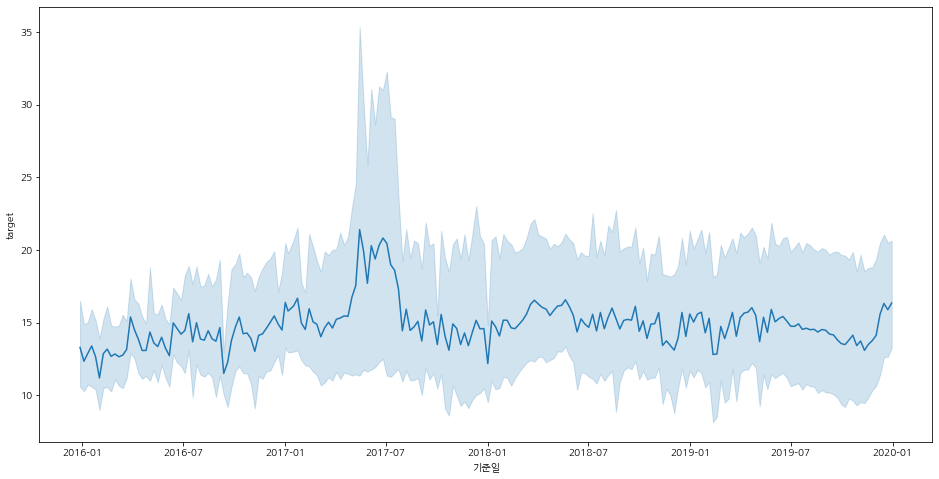

In [9]:
# 2017년 몇개의 데이터를 제외하고 큰 이상치가 나타나진 않는다.
plt.figure(figsize = (16,8))
sns.lineplot(data = df, x = '기준일', y = 'target')

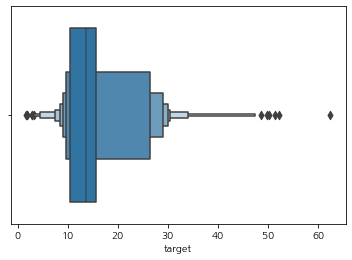

In [10]:
# 이상치도 많이 존재 하는 것으로 보인다.
sns.boxenplot(df['target'])

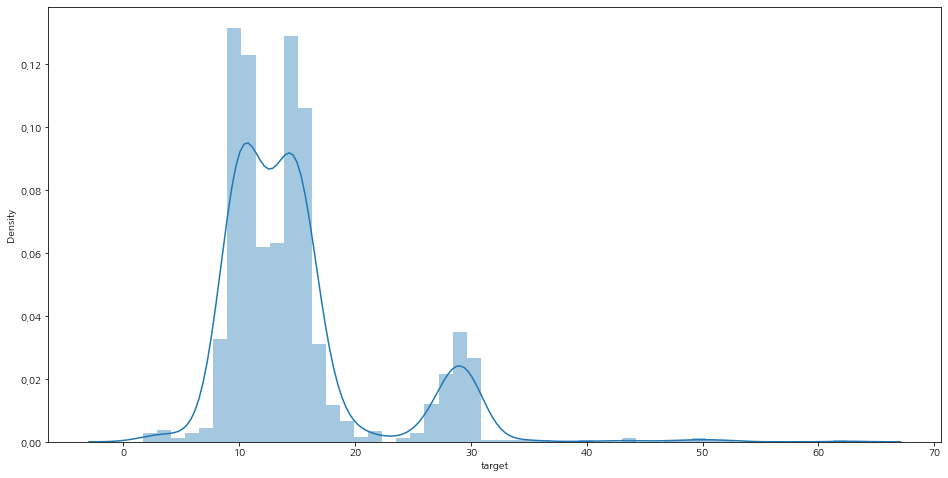

In [11]:
# 분포가 쌍곡분포를 따른다.
plt.figure(figsize = (16,8))
sns.distplot(df['target'])

In [12]:
# 이상치 제거를 IQR 방법을 통해서 제거해 보도록 하자.
def get_outlier(df=None, column=None, weight=4.0):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

delete_index = get_outlier(df = df, column = 'target', weight = 3.0)
print(delete_index)
df_iqr = df.drop(delete_index, axis = 0)

Int64Index([14005, 14240, 14444, 14639, 14834, 15054, 15244, 15449, 15607,
            15663, 15859, 16051, 20171, 26537],
           dtype='int64')


In [13]:
# 노르웨이의 가격 인상으로 인해서 이상치가 생겨났다.
# 대부분의 데이터가 2017년의 데이터라는 걸 확인할 수 있다.
df.loc[delete_index,:]

,기준일,제품구분,제조국,수출국,수입용도,중분류명 카테고리,어종,상세어종,수입형태,target,month,year,day
14005,2017-05-08,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",34.521310,5,2017,8
14240,2017-05-15,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",62.457202,5,2017,15
14444,2017-05-22,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",49.777500,5,2017,22
14639,2017-05-29,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",40.521693,5,2017,29
14834,2017-06-05,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",51.394008,6,2017,5
15054,2017-06-12,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.791678,6,2017,12
15244,2017-06-19,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",48.550884,6,2017,19
15449,2017-06-26,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",43.481666,6,2017,26
15607,2017-07-03,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",32.806026,7,2017,3
15663,2017-07-03,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",50.173407,7,2017,3


Text(0.5, 1.0, '이상치 제거를 안했을 때 lineplot')

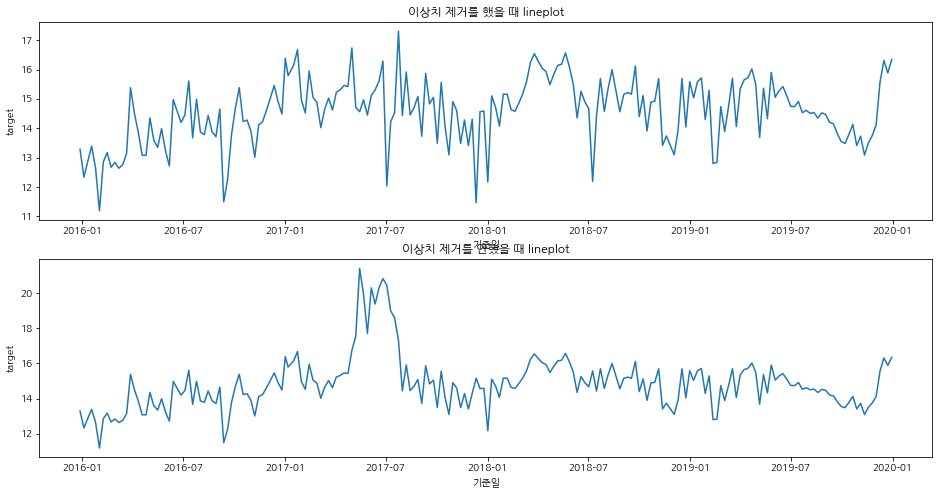

In [14]:
# 이상치 제거를 했을 때와 안했을 때 차이가 있는지 확인해 보자.
plot_data = df_iqr[['기준일','target']].groupby('기준일').mean().reset_index()
plot_data1 = df[['기준일', 'target']].groupby('기준일').mean().reset_index()
plot_data

fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.lineplot(data = plot_data, x = '기준일', y = 'target', ax = ax[0])
sns.lineplot(data = plot_data1, x = '기준일', y = 'target', ax = ax[1])
ax[0].set_title('이상치 제거를 했을 때 lineplot')
ax[1].set_title('이상치 제거를 안했을 때 lineplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 boxenplot')

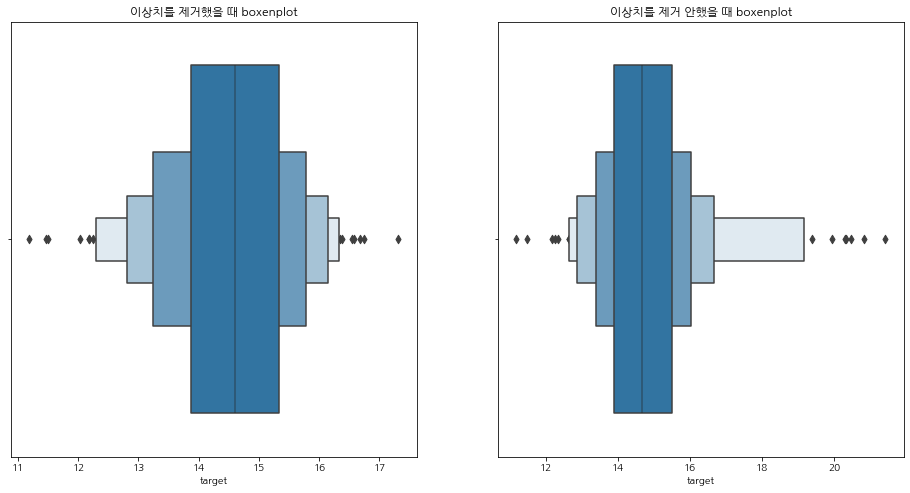

In [16]:
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.boxenplot(plot_data['target'], ax = ax[0])
sns.boxenplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 boxenplot')
ax[1].set_title('이상치를 제거 안했을 때 boxenplot')

Text(0.5, 1.0, '이상치를 제거 안했을 때 distplot')

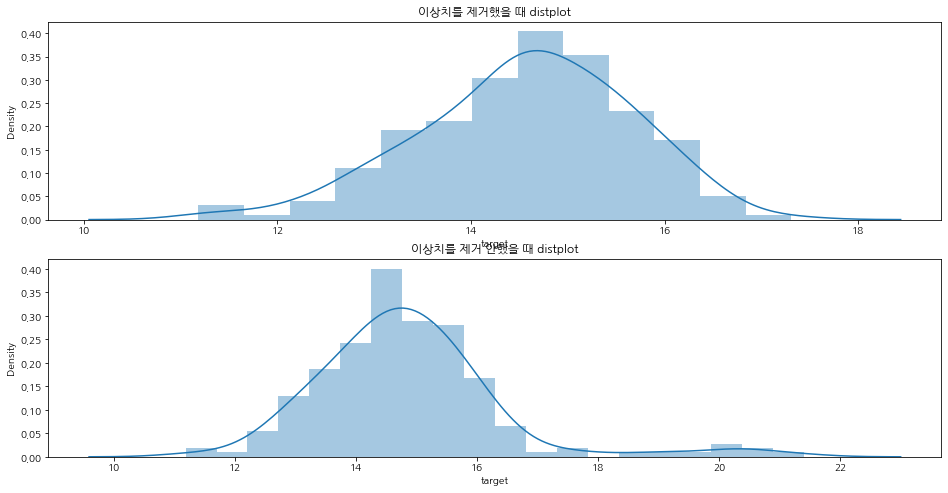

In [17]:
fig, ax = plt.subplots(nrows = 2, figsize = (16,8))
sns.distplot(plot_data['target'], ax = ax[0])
sns.distplot(plot_data1['target'], ax = ax[1])
ax[0].set_title('이상치를 제거했을 때 distplot')
ax[1].set_title('이상치를 제거 안했을 때 distplot')

In [18]:
# 위의 그래프를 보면 이상치를 제거했을 때 log를 정규성이 되지 않을까?
from scipy.stats import shapiro
alpha = 0.05

# 이상치를 제거했을 때 정규성을 띄는 것을 볼 수 있다.
# p_value > 0.05임으로 정규성을 만족한다.
stats, p = shapiro(plot_data['target'])
print('이상치 제거 데이터 :',stats, p)

# 이상치를 제거하고 log를 씌웠을 때 정규성을 만족하지 않는다.
stats, p = shapiro(plot_data['target'].apply(lambda x:np.log1p(x)))
print('이상치 제거 데이터 + log :', stats, p)

이상치 제거 데이터 : 0.9883154034614563 0.08381788432598114
이상치 제거 데이터 + log : 0.9764614105224609 0.0013710882049053907
